In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the correct path to the CSV file with the name of the CSV file
dataset_path = "../data/merged_dataset.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)



In [4]:
df #Check if the dataframe work

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews
0,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365
2,The Lord of the Rings: The Return of the King,2003,PG-13,3h 21min,Adventure; Drama; Fantasy;,17 December 2003 (USA),8.9,1593859,3681
3,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979
4,The Lord of the Rings: The Two Towers,2002,PG-13,2h 59min,Adventure; Drama; Fantasy;,18 December 2002 (USA),8.7,1440188,2559
...,...,...,...,...,...,...,...,...,...
1495,Catch-22,1970,R,2h 2min,Comedy; Drama; War;,24 June 1970 (USA),7.1,21424,145
1496,The Great Raid,2005,R,2h 12min,Action; Drama; War;,12 August 2005 (USA),6.7,20965,194
1497,Saints and Soldiers,2003,PG-13,1h 30min,Action; Drama; War;,25 March 2005 (USA),6.7,19730,163
1498,Stop-Loss,2008,R,1h 52min,Drama; War;,28 March 2008 (USA),6.4,19456,102


In [5]:
#I want to check which data types the columns are
print(df.dtypes)
#This is to check if e.g. year is a numeric format.

name             object
year              int64
movie_rated      object
run_length       object
genres           object
release_date     object
rating          float64
num_raters        int64
num_reviews       int64
dtype: object


In [6]:
#I want to take a look at the different genres to make sure that "Action" is there.
unique_genres = df['genres'].unique()
print(unique_genres)

['Action; Adventure; Sci-Fi; ' 'Action; Adventure; Drama; '
 'Adventure; Drama; Fantasy; ' 'Action; Adventure; '
 'Adventure; Drama; Sci-Fi; ' 'Adventure; Drama; War; '
 'Action; Adventure; Fantasy; ' 'Action; Adventure; Comedy; '
 'Adventure; Comedy; Sci-Fi; ' 'Animation; Adventure; '
 'Animation; Adventure; Comedy; ' 'Animation; Adventure; Drama; '
 'Adventure; Fantasy; ' 'Adventure; Comedy; Crime; '
 'Animation; Action; Adventure; ' 'Action; Adventure; Thriller; '
 'Action; Adventure; Mystery; ' 'Action; Adventure; Horror; '
 'Adventure; Sci-Fi; ' 'Adventure; Mystery; Sci-Fi; '
 'Adventure; Biography; Drama; ' 'Adventure; Thriller; '
 'Animation; Comedy; ' 'Animation; Fantasy; '
 'Animation; Adventure; Fantasy; ' 'Animation; Drama; '
 'Animation; Drama; War; ' 'Animation; Action; Comedy; '
 'Animation; Comedy; Fantasy; ' 'Animation; Drama; Fantasy; '
 'Animation; Comedy; Drama; ' 'Animation; Drama; Sci-Fi; '
 'Biography; Drama; History; ' 'Biography; Crime; Drama; '
 'Biography; Dra

In [7]:
#Action is included in several genres.
#I want to look at "action" and "year". 

action_movies = df[df["genres"].str.contains('Action', na=False)]
action_movies_per_year = action_movies.groupby('year').size()

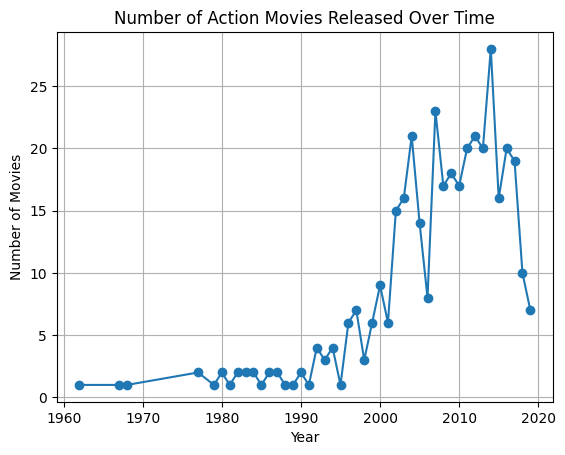

In [8]:
#Creating a plot (line graph) to show the number of action movies per year

plt.Figure(figsize=(10,6))
plt.plot(action_movies_per_year.index, action_movies_per_year.values, marker="o")
plt.title("Number of Action Movies Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

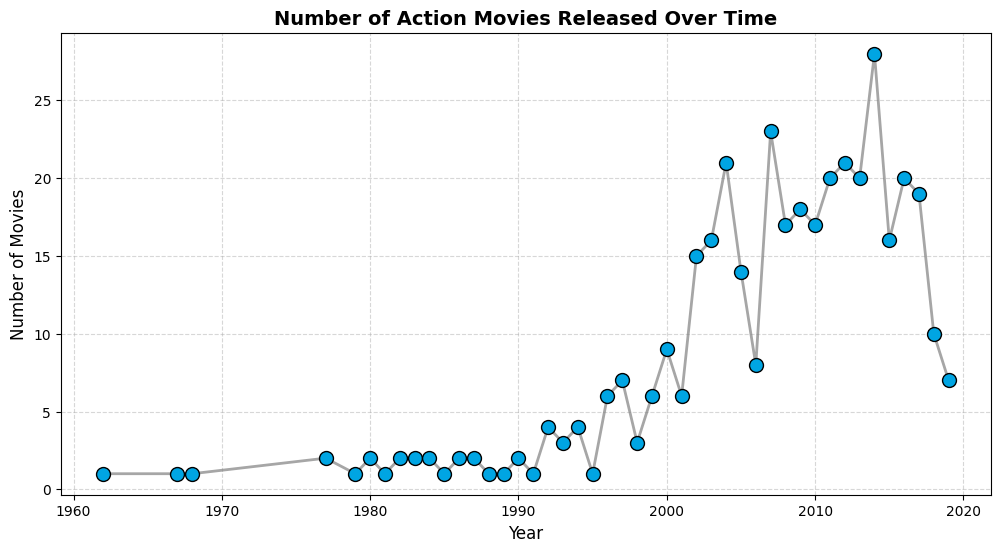

In [ ]:
# Devloping the figure more
years = action_movies_per_year.index
counts = action_movies_per_year.values

plt.figure(figsize=(12, 6))

# Plot the line
plt.plot(years, counts, color="gray", linestyle="-", linewidth=2, alpha=0.7)  # Light gray line

# Scatter plot with color scale
sc = plt.scatter(years, counts, c="#00A5E3", edgecolors="black", s=100, zorder=3) 

# Labels and grid
plt.title("Number of Action Movies Released Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

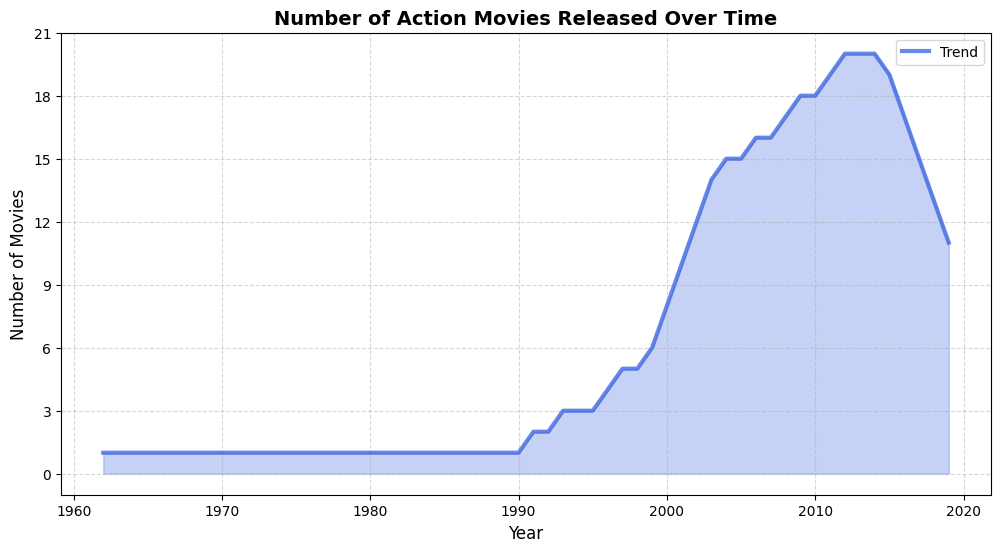

In [ ]:
#Creating a smoother plot
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import MaxNLocator #for integer numbers instead of decimals on the y-axis

# Sample data
years = action_movies_per_year.index
counts = action_movies_per_year.values

# Smooth the line using Gaussian filtering
smooth_counts = gaussian_filter1d(counts, sigma=2)

plt.figure(figsize=(12, 6))
plt.plot(years, smooth_counts, color="royalblue", linewidth=3, label="Trend", alpha=0.8)
plt.fill_between(years, smooth_counts, color="royalblue", alpha=0.3)  # Adds a nice shaded effect

# Force integer values on the y-axis
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Number of Action Movies Released Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()